In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [6]:
# data allocation
data = pd.read_csv("insurance.csv")

In [7]:
# checking the first 5 data
data.head()

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [8]:
# checking the DataFrame including the index dtype and columns, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [9]:
# checking the basic statistical information
data.describe()

,age,gender,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [12]:
# data partitioning train set and test set
# X = independent columns / y = dependent column
X = data.drop("charges", axis=1)
y = data["charges"]

In [14]:
X.head()

,age,gender,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [15]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [21]:
# data partitioning to train & test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [18]:
X_train.count()

age         1070
gender      1070
bmi         1070
children    1070
smoker      1070
dtype: int64

In [19]:
X_test.count()

age         268
gender      268
bmi         268
children    268
smoker      268
dtype: int64

In [23]:
# assigning linear regression
lr = LinearRegression()

In [29]:
# find the fit position of train set
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# get predict value
pred = lr.predict(X_test)

In [31]:
# turn in to dataframe to see the insight
result = pd.DataFrame({"actual" : y_test, "predict" : pred})

<AxesSubplot:xlabel='actual', ylabel='predict'>

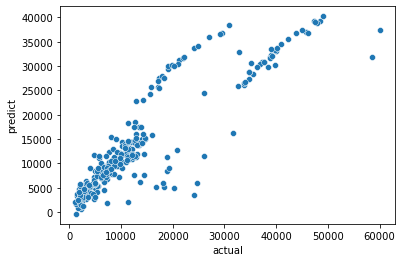

In [34]:
# visualization
sns.scatterplot(x = "actual", y = "predict", data = result)

In [36]:
# RMSE
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test, pred, squared=False)

5684.927776334484

In [39]:
lr.score(X_train, y_train)

0.7368220127747351

In [40]:
# Creating a Linear Regression Model
lr.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [45]:
pd.Series(lr.coef_, index = X_train.columns)

age           264.799803
gender         17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [42]:
lr.intercept_

-11576.99997611236

In [46]:
X_test.head()

,age,gender,bmi,children,smoker
12,23,1,34.400,0,0
306,28,0,27.500,2,0
318,44,0,27.645,0,0
815,20,0,31.460,0,0
157,18,1,25.175,0,1


In [50]:
# the calculation of the equation
# predict_charges = (age_coef * age) + (gender_coef * gender) + (bmi_coef * bmi) + (children_coef * children) + (smoker_coef * somker) - yintercept
predict_charges = (264.799803 * 23) + (17.344661 * 1) + (297.514806 * 34.400) + (469.339602 * 0) + (23469.280173*0) - 11576.99997611236 
predict_charges

4765.249480287641

In [52]:
# check the actual prediction value
pred[0]

4765.249465933666